In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r"data\loan_approval_dataset.csv")

In [4]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
data.shape

(4269, 13)

In [11]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [9]:
# check duplicates
data[data["loan_id"].duplicated()]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [6]:
data["loan_id"].nunique()

4269

In [7]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [12]:
df = data.drop("loan_id", axis =  1)

In [13]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

the column names has a white space in the beginning which we are removing

In [15]:
type(df.columns)

pandas.core.indexes.base.Index

In [14]:
df.columns = df.columns.str.replace(" ", "")

In [16]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [17]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [18]:
X = df.drop("loan_status", axis = 1)
y = df["loan_status"].copy()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
train_df = pd.concat([X_train, y_train], axis = 1)

**Education**

In [22]:
X_train["education"].value_counts().index

Index([' Graduate', ' Not Graduate'], dtype='object', name='education')

In [23]:
palette_color = sns.color_palette("bright")

Text(0.5, 1.0, 'Education')

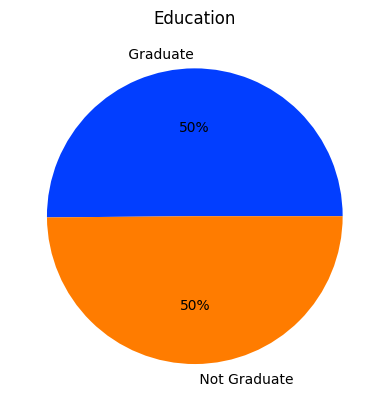

In [24]:
plt.pie(X_train["education"].value_counts(), labels= X_train["education"].value_counts().index, colors= palette_color, autopct="%.0f%%")
plt.title("Education")

<Axes: xlabel='education', ylabel='count'>

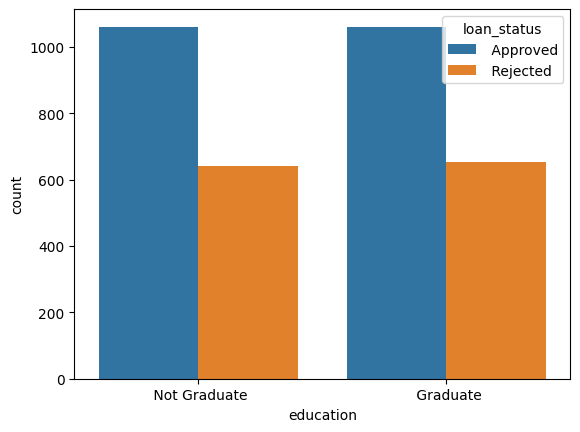

In [62]:
sns.countplot(data = train_df, x = "education", hue = "loan_status")

**Self Employed**

Text(0.5, 1.0, 'Self Employed')

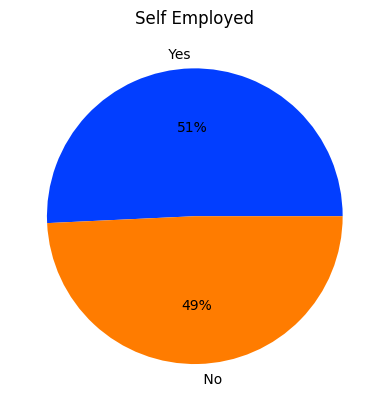

In [25]:
plt.pie(X_train["self_employed"].value_counts(), labels= X_train["self_employed"].value_counts().index, colors= palette_color, autopct="%.0f%%")
plt.title("Self Employed")

<Axes: xlabel='self_employed', ylabel='count'>

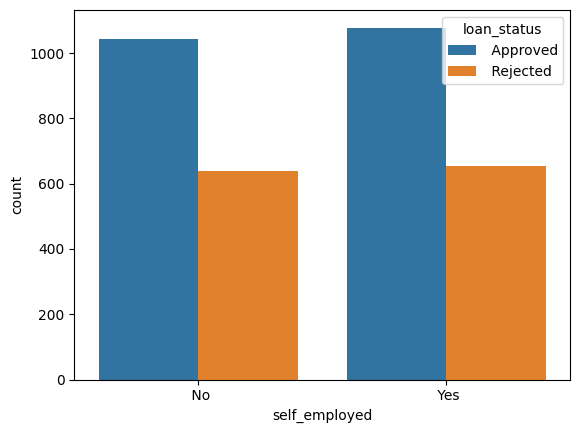

In [64]:
sns.countplot(data = train_df, x = "self_employed", hue = "loan_status")

In [26]:
X_train.select_dtypes(include="number").columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

**No. of dependents**

<Axes: >

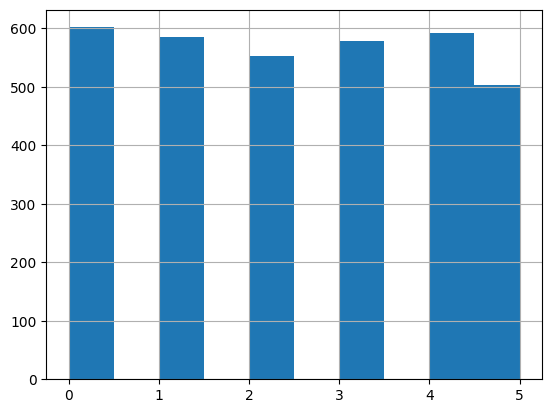

In [27]:
X_train['no_of_dependents'].hist()

In [28]:
X_train[X_train['no_of_dependents'] > 3]['no_of_dependents'].value_counts()

no_of_dependents
4    593
5    503
Name: count, dtype: int64

In [30]:
import seaborn as sns

<Figure size 1000x1000 with 0 Axes>

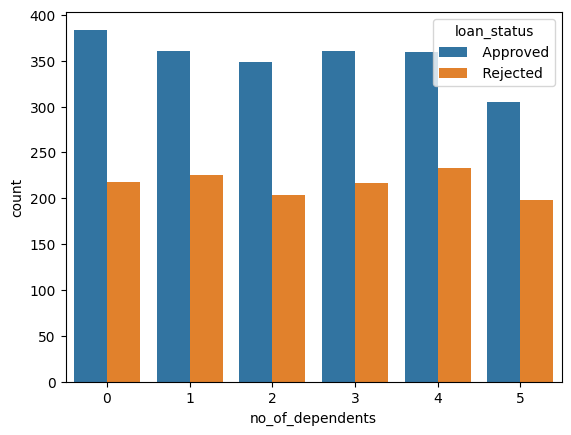

<Figure size 1000x1000 with 0 Axes>

In [31]:
sns.countplot(X_train, x = 'no_of_dependents', hue= y_train)
plt.figure(figsize=(10, 10))

In [34]:
train_df = pd.concat([X_train, y_train], axis = 1)

In [35]:
train_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1675,5,Not Graduate,No,7900000,29900000,6,568,5800000,13900000,15900000,8700000,Approved
1164,0,Not Graduate,Yes,9600000,34000000,12,710,23800000,10300000,38100000,7800000,Approved
192,1,Graduate,No,800000,2900000,8,682,2200000,1100000,2900000,700000,Approved
910,2,Graduate,Yes,4900000,13100000,18,754,8200000,3300000,16500000,7200000,Approved
567,5,Graduate,Yes,3000000,11100000,12,441,8500000,2500000,7300000,2000000,Rejected


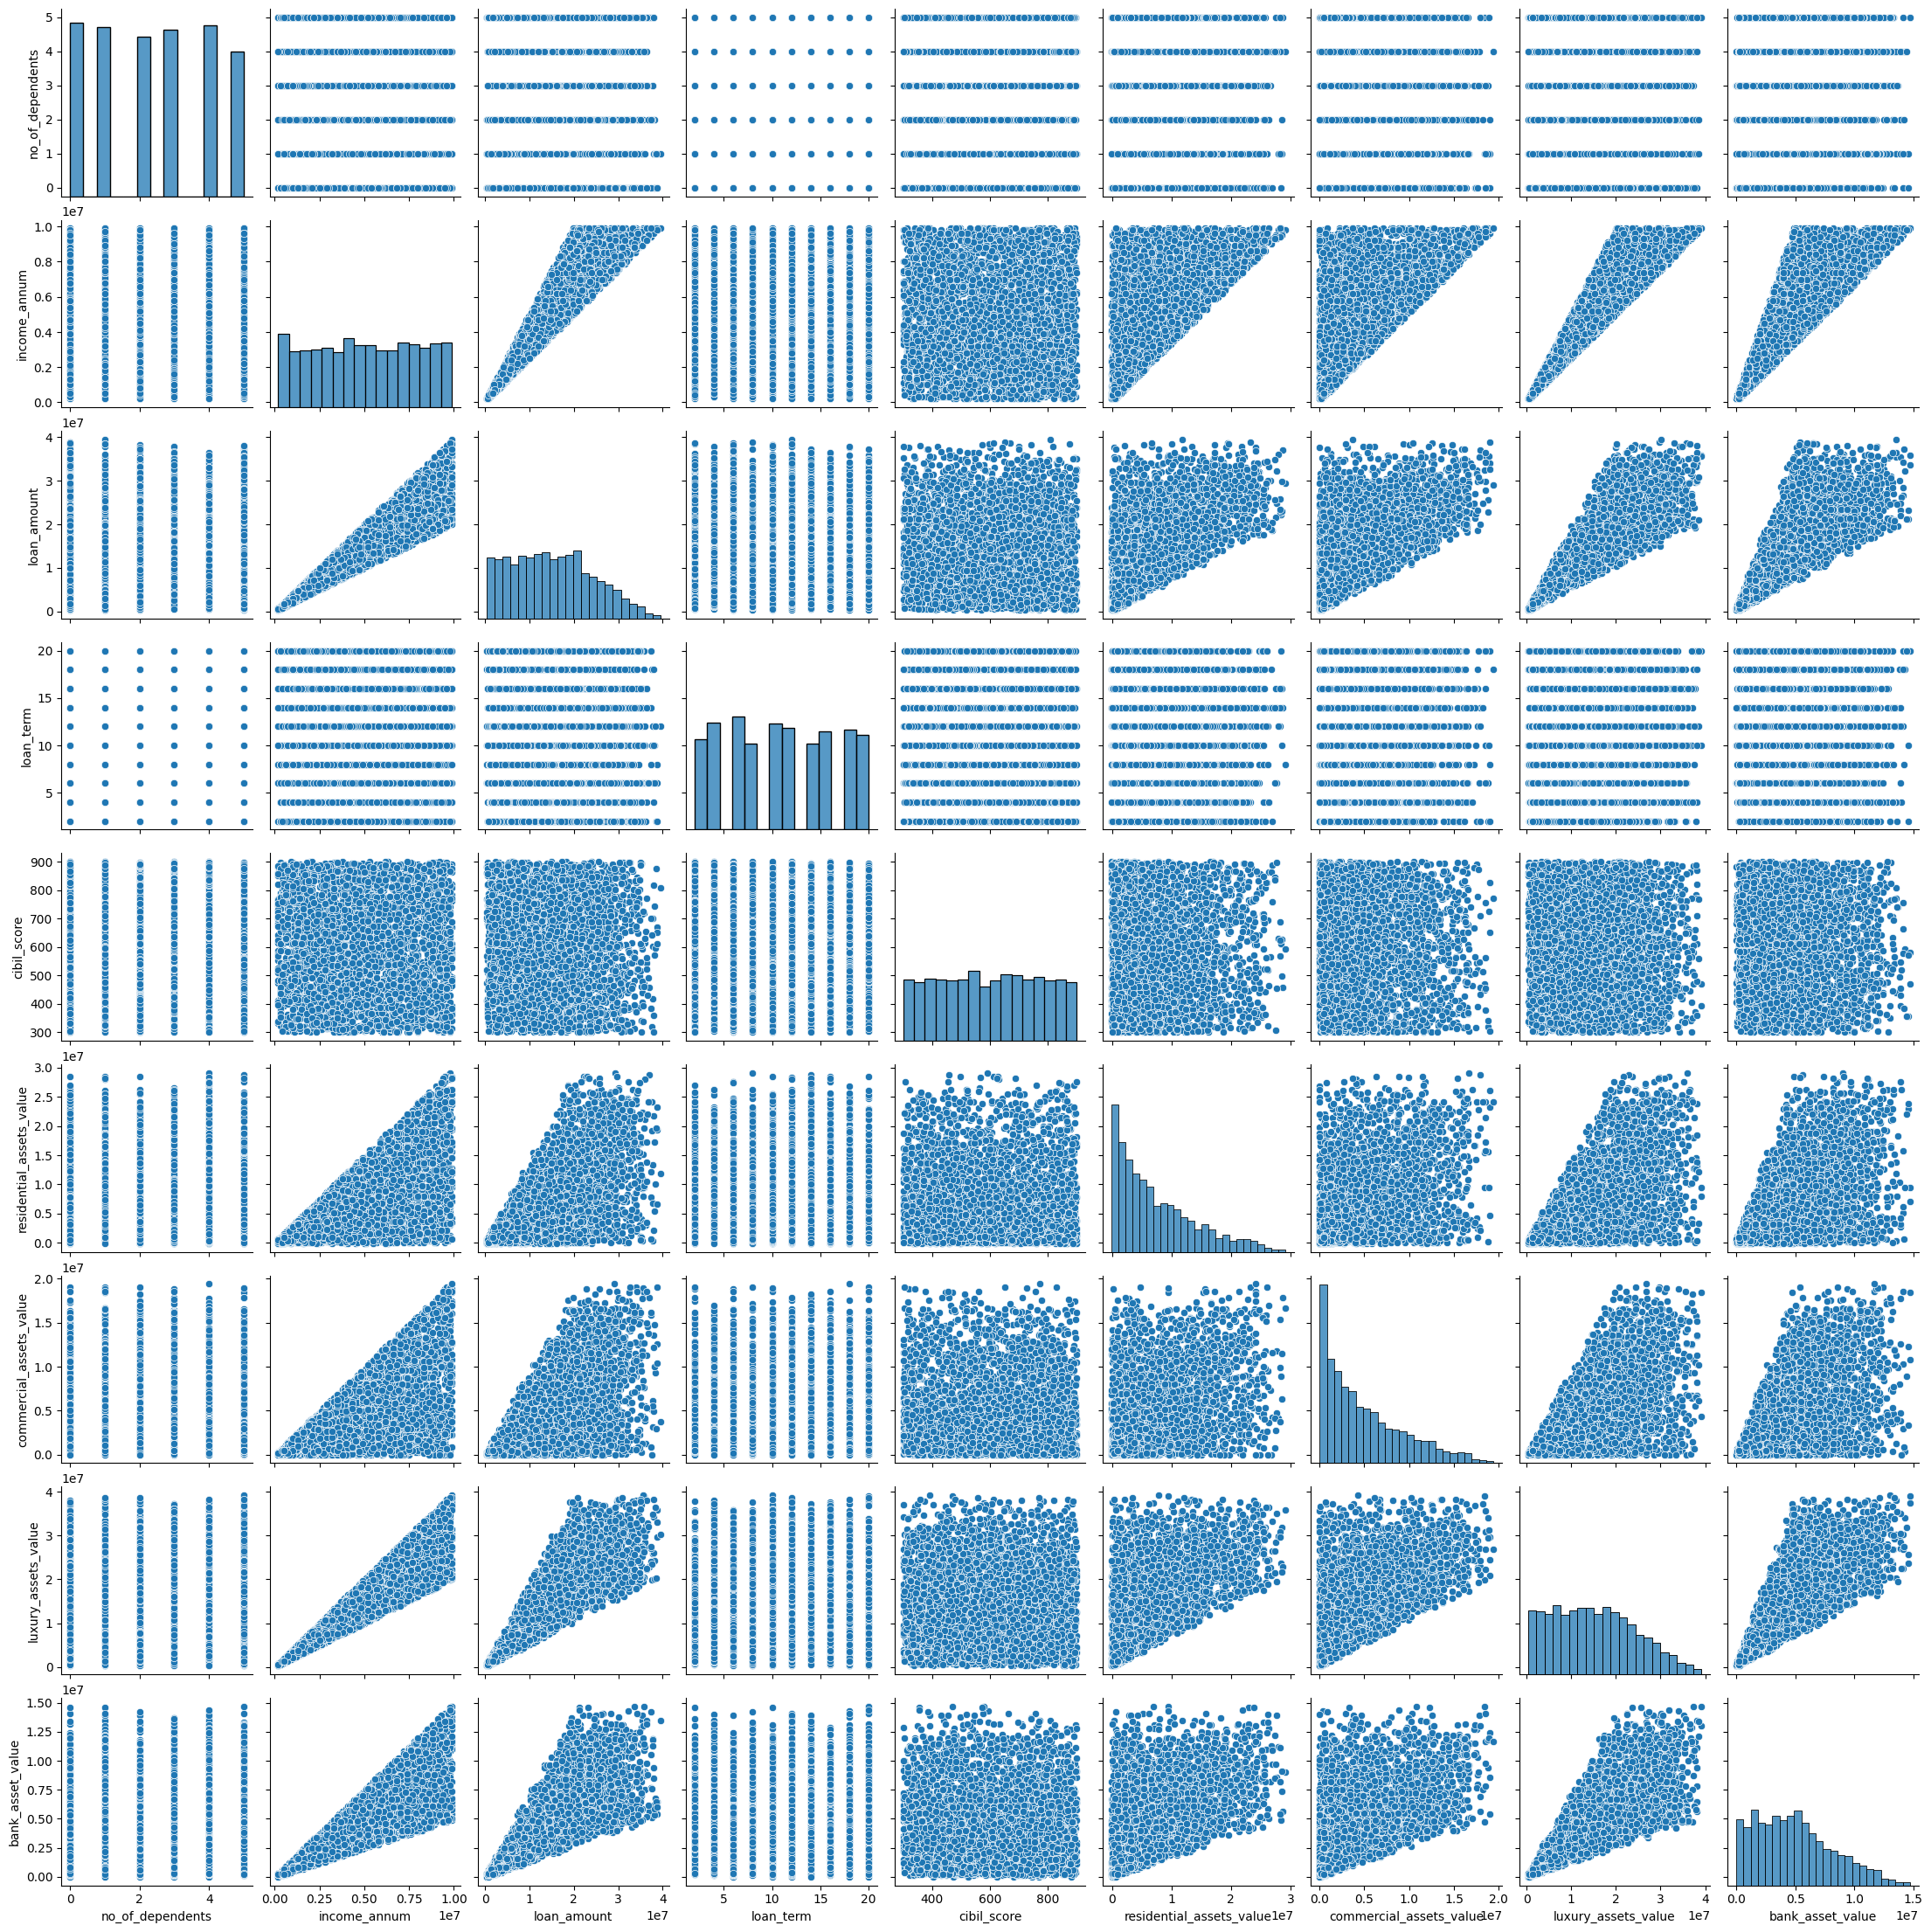

In [36]:
sns.pairplot(train_df)

obs:
- useful cols: loan_term, cibil_score, income_annum
- not so useful: no. of dependents, education, self_employed

**Loan Term**

<Axes: xlabel='loan_term', ylabel='count'>

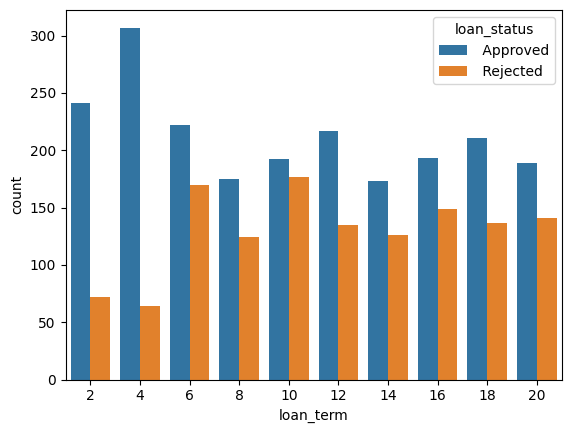

In [37]:
sns.countplot(data = train_df, x = "loan_term", hue = "loan_status")

as long term is increasing, the rejection rate is increasing on average.

**cibil score**

<Axes: >

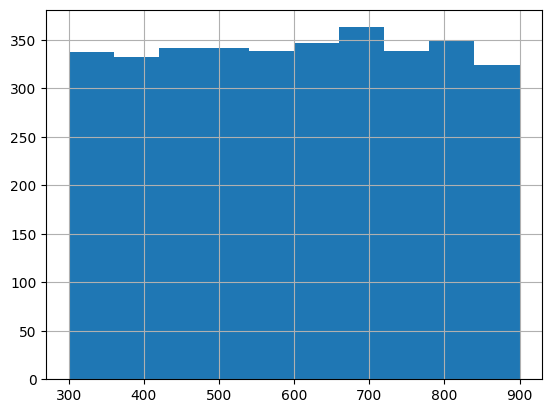

In [40]:
train_df["cibil_score"].hist()

In [41]:
cibil_cat = pd.cut(train_df["cibil_score"], bins = [300, 400, 500, 600, 700, 800, 900], labels= ["300-400", "400-500", "500-600", "600-700", "700-800", "800-900"] )

In [54]:
cibil = pd.DataFrame(cibil_cat)

In [55]:
cibil["loan_status"] = y_train

In [56]:
cibil.head()

,cibil_score,loan_status
1675,500-600,Approved
1164,700-800,Approved
192,600-700,Approved
910,700-800,Approved
567,400-500,Rejected


<Axes: xlabel='cibil_score', ylabel='count'>

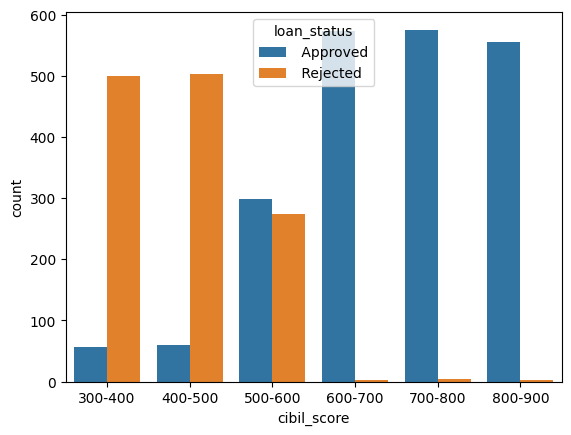

In [58]:
sns.countplot(data = cibil, x = "cibil_score", hue = "loan_status")

<Axes: xlabel='education', ylabel='count'>

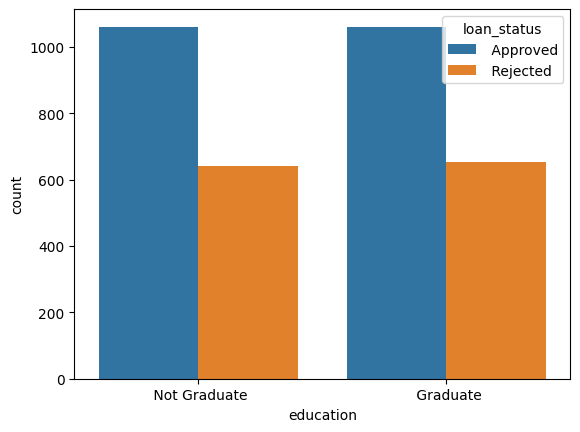

In [61]:
sns.countplot(data = train_df, x = "education", hue = "loan_status")

**Income per Annum**

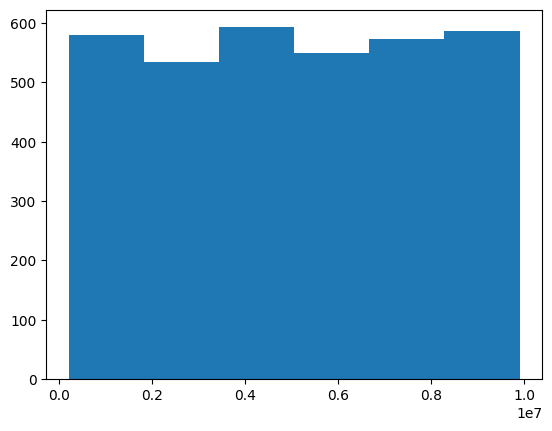

In [75]:
n, bins, patches = plt.hist(train_df["income_annum"], bins = 6)

In [76]:
bins

array([ 200000.        , 1816666.66666667, 3433333.33333333,
       5050000.        , 6666666.66666667, 8283333.33333333,
       9900000.        ])

In [77]:
income_cat = pd.cut(train_df["income_annum"], 
                     bins = [ 200000., 1816666.66666667, 3433333.33333333,
                            5050000., 6666666.66666667, 8283333.33333333,
                            9900000.], 
                     labels= [ 1816666., 3433333.,
                            5050000., 6666666., 8283333.,
                            9900000.])

In [78]:
income_cat

1675    8283333.0
1164    9900000.0
192     1816666.0
910     5050000.0
567     3433333.0
          ...    
3444    1816666.0
466     1816666.0
3092    9900000.0
3772    8283333.0
860     6666666.0
Name: income_annum, Length: 3415, dtype: category
Categories (6, float64): [1816666.0 < 3433333.0 < 5050000.0 < 6666666.0 < 8283333.0 < 9900000.0]

In [79]:
income = pd.DataFrame(income_cat)

In [80]:
income["loan_status"] = y_train

<Axes: xlabel='income_annum', ylabel='count'>

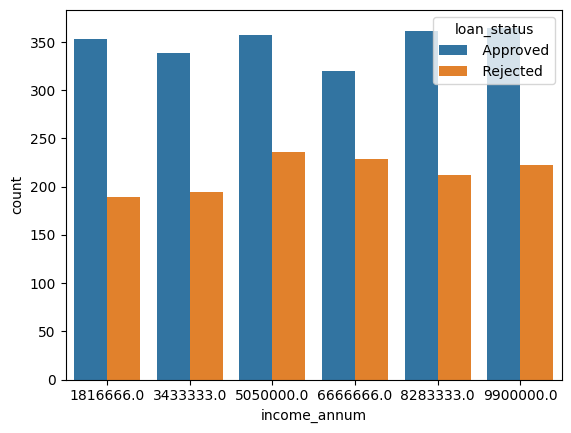

In [81]:
sns.countplot(data = income, x = "income_annum", hue = "loan_status")